<a href="https://colab.research.google.com/github/yuliapratiwi169/Handling-Missing-Value-and-Outliers-/blob/main/Outliers_dan_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Anggota Kelompok :

## Yulia Pratiwi (G1A021029)
## Zabrila Amrina Zadia putri (G1A021053)

In [4]:
#IMPORT LIBRARY YANG DIBUTUHKAN

import pandas as pd
import seaborn as sns
import pandas as pan
import matplotlib.pyplot as plt
import numpy as np
import numpy as num
import statistics

In [8]:
#load dataset menggunakan URL
df = pan.read_csv("https://raw.githubusercontent.com/yuliapratiwi169/Handling-Missing-Value-and-Outliers-/main/shopping_data_missingvalue.csv")

In [9]:
#Menampilkan 5 record teratas dari dataset yang telah di load, menggunakan head()
## Data yang digunakan adalah data belanja Konsumen dimana terdapat jenis kelamin, umur penghasilan dan pengeluaran
df.head()

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19.0,15,39
1,2,Male,NaN,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,33


In [10]:
#Panjang Dataset

df.shape

(200, 5)

In [31]:
#Menampilkan informasi column, datatype dan informasi struktur lainnya pada dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     200 non-null    int64  
 1   Genre          200 non-null    object 
 2   Age            200 non-null    float64
 3   Income         200 non-null    int64  
 4   SpendingScore  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [12]:
#descriptive statistics dataset

df.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,192.000000,200.000000,200.000000
mean,100.500000,49.000000,60.560000,50.375000
std,57.879185,50.037264,26.264721,25.626705
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,41.500000,34.750000
50%,100.500000,37.500000,61.500000,50.000000
75%,150.250000,50.000000,78.000000,73.000000
max,200.000000,363.000000,137.000000,99.000000


In [14]:
# mengganti missing value menggunakan Mode

df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df.head()

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19.0,15,39
1,2,Male,32.0,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,33


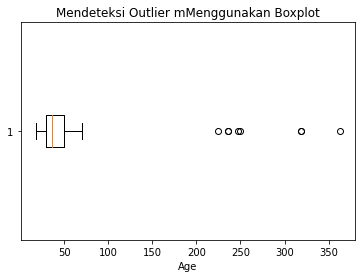

In [15]:
#Menampilkan outliers dataset pada baris writing score menggunakan boxplot
sample= df["Age"]

plt.boxplot(sample, vert=False)
plt.title("Mendeteksi Outlier mMenggunakan Boxplot")
plt.xlabel('Age')
plt.show()

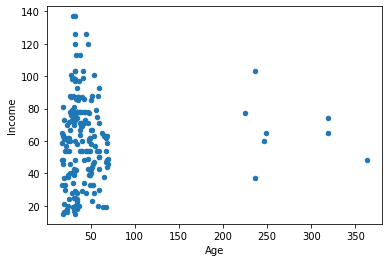

In [28]:
#Mengidentifikasi Outlier menggunakan Scatter plot
# Titik titik yang berpencar menjauh adalah Outliers

df.plot(x='Age',y='Income',kind = 'scatter') 
plt.show()

In [16]:
outliers = []
def detect_outliers_zscore(data):
    theres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > theres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [236.0, 363.0, 247.0, 319.0, 249.0, 319.0, 225.0, 236.0]


In [18]:
#Mencari nilai kuartil 1, kuartil 3, dan IQR

Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
print('Kuartil 1 = ', Q1)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

min_IQR = Q1 - 1.5 * IQR
max_IQR = Q3 + 1.5 * IQR

print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

nilai_min = np.min(df["Age"])
nilai_max = np.max(df["Age"])

Kuartil 1 =  30.0
Kuartil 3 =  50.0
IQR =  20.0
IQR minimum =  0.0
IQR maksimum =  80.0


In [20]:
#Mencari Outlier menggunakan IQR
low_out = []
high_out = []

for i in df["Age"]:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : ', low_out)
print('High outlier : ', high_out)

Low outlier :  []
High outlier :  [236.0, 363.0, 247.0, 319.0, 249.0, 319.0, 225.0, 236.0]


In [21]:
#menghapus outlier berdasarkan rentang IQR dan menyimpan hasilnya dalam bingkai data 'df_new'
# Setelah dihapus panjang dataset yang semula (200,5) menjadi (192,5) berarti sebanyak 8 data dihapus

df_new = df[~((df.Age < (Q1 - 1.5 * IQR)) | (df.Age > (Q3 + 1.5 * IQR)))]
df_new

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19.0,15,39
1,2,Male,32.0,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,33
...,...,...,...,...,...
195,196,Female,32.0,120,79
196,197,Female,45.0,126,28
197,198,Male,32.0,126,74
198,199,Male,32.0,137,18


In [22]:
# Menentukan flooring and capping pada dataset

tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
print("New array:",b)

22.0 65.1
New array: [22.  32.  22.  23.  31.  22.  35.  23.  64.  30.  65.1 32.  58.  24.
 37.  32.  35.  22.  52.  35.  35.  25.  32.  31.  54.  29.  45.  35.
 40.  32.  60.  22.  53.  22.  49.  22.  42.  30.  65.1 22.  65.  24.
 48.  31.  49.  24.  50.  27.  29.  31.  49.  33.  31.  59.  50.  47.
 51.  65.1 27.  53.  65.1 22.  65.1 54.  65.1 22.  43.  65.1 22.  32.
 65.1 47.  60.  60.  59.  26.  45.  40.  23.  49.  57.  38.  65.1 46.
 22.  48.  55.  22.  34.  50.  65.1 22.  48.  40.  32.  24.  65.1 27.
 48.  22.  23.  49.  65.1 26.  49.  22.  65.1 54.  65.1 65.1 65.  22.
 38.  22.  22.  65.1 63.  65.1 51.  50.  27.  38.  40.  39.  23.  31.
 43.  40.  59.  38.  47.  39.  25.  31.  22.  29.  44.  32.  65.1 35.
 57.  32.  28.  32.  65.1 28.  48.  32.  34.  34.  43.  39.  44.  38.
 47.  27.  37.  30.  34.  30.  56.  29.  22.  31.  50.  36.  42.  33.
 36.  32.  40.  28.  36.  36.  52.  30.  58.  27.  59.  35.  37.  32.
 32.  29.  41.  30.  54.  28.  41.  65.1 32.  32.  33.  38.  47.  32.

In [23]:
# mengganti Nilai Outlier Menggunakan Imputation (median)

median = np.median(sample)
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)

Sample:  0      19.0
1      32.0
2      20.0
3      23.0
4      31.0
       ... 
195    32.0
196    45.0
197    32.0
198    32.0
199    30.0
Name: Age, Length: 200, dtype: float64
New array:  [ 19.  32.  20.  23.  31.  22.  35.  23.  64.  30.  67.  32.  58.  24.
  37.  32.  35.  20.  52.  35.  35.  25.  32.  31.  54.  29.  45.  35.
  40.  32.  60.  21.  53.  18.  49.  21.  42.  30.  14.  20.  65.  24.
  48.  31.  49.  24.  50.  27.  29.  31.  49.  33.  31.  59.  50.  47.
  51.  69.  27.  53.  70.  19.  67.  54. 363.  18.  43.  68.  19.  32.
  70.  47.  60.  60.  59.  26.  45.  40.  23.  49.  57.  38.  67.  46.
  21.  48.  55.  22.  34.  50.  68.  18.  48.  40.  32.  24. 247.  27.
  48.  20.  23.  49.  67.  26.  49.  21.  66.  54.  68.  66.  65.  19.
  38.  19.  18. 319.  63. 249.  51.  50.  27.  38.  40.  39.  23.  31.
  43.  40.  59.  38.  47.  39.  25.  31.  20.  29.  44.  32. 319.  35.
  57.  32.  28.  32. 225.  28.  48.  32.  34.  34.  43.  39.  44.  38.
  47.  27.  37.  30.  34.  

In [24]:
# mengganti Nilai Outlier Menggunakan Imputation (mean)

mean = np.mean(sample)
for i in sample_outliers:
    c = np.where(sample==i, 14,sample)
print("Sample: ", sample)
print("New array: ",c)

Sample:  0      19.0
1      32.0
2      20.0
3      23.0
4      31.0
       ... 
195    32.0
196    45.0
197    32.0
198    32.0
199    30.0
Name: Age, Length: 200, dtype: float64
New array:  [ 19.  32.  20.  23.  31.  22.  35.  23.  64.  30.  67.  32.  58.  24.
  37.  32.  35.  20.  52.  35.  35.  25.  32.  31.  54.  29.  45.  35.
  40.  32.  60.  21.  53.  18.  49.  21.  42.  30.  14.  20.  65.  24.
  48.  31.  49.  24.  50.  27.  29.  31.  49.  33.  31.  59.  50.  47.
  51.  69.  27.  53.  70.  19.  67.  54. 363.  18.  43.  68.  19.  32.
  70.  47.  60.  60.  59.  26.  45.  40.  23.  49.  57.  38.  67.  46.
  21.  48.  55.  22.  34.  50.  68.  18.  48.  40.  32.  24. 247.  27.
  48.  20.  23.  49.  67.  26.  49.  21.  66.  54.  68.  66.  65.  19.
  38.  19.  18. 319.  63. 249.  51.  50.  27.  38.  40.  39.  23.  31.
  43.  40.  59.  38.  47.  39.  25.  31.  20.  29.  44.  32. 319.  35.
  57.  32.  28.  32. 225.  28.  48.  32.  34.  34.  43.  39.  44.  38.
  47.  27.  37.  30.  34.  

Text(0.5, 0, 'Age')

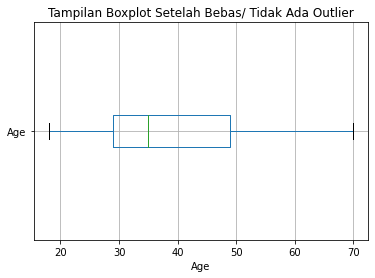

In [27]:
#Menampilkan boxplot yang telah bebas dari outliers 

df_new.boxplot(["Age"],vert=False)
plt.title("Tampilan Boxplot Setelah Bebas/ Tidak Ada Outlier")
plt.xlabel("Age")

## Correlation Analysis (bivariate)

In [29]:
# Menemukan korelasi antara semua variabel numerik

df.select_dtypes(['float64' , 'int64']).corr()

,CustomerID,Age,Income,SpendingScore
CustomerID,1.000000,0.027758,0.977548,0.003186
Age,0.027758,1.000000,0.027939,-0.148001
Income,0.977548,0.027939,1.000000,-0.000776
SpendingScore,0.003186,-0.148001,-0.000776,1.000000


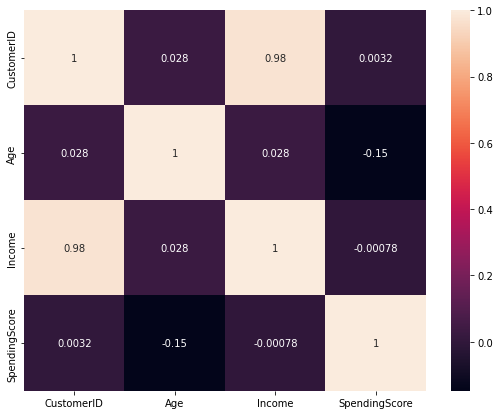

In [30]:
# ini adalah tampilan korelasi menggunakan heatmap  semakin pekat warnannya maka korelasinya akan semakin kuat

plt = plt.figure(figsize=(9,7)) 
sns.heatmap(df.select_dtypes(['float64' , 'int64']).corr(), annot=True) 
plt.show()